<a href="https://colab.research.google.com/github/AveryGaoo/PRF_ProgrammingFoundations_notebooks/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Python Data Lab - Exploring Hofstede’s Cultural Dimensions (2015)

##  Learning Goals

# By the end of this lab, you will be able to:

# . Load and explore data using Pandas
#2. Clean and prepare a dataset for analysis
#3. Use visualizations (Matplotlib, Seaborn, Plotly) to explore cultural differences
#4. Apply statistical summaries and similarity measures between countries
#5. Create and use a Python class to structure your analysis



In [67]:
!pip install pandas matplotlib seaborn plotly scikit-learn --quiet

In [40]:

# Setup
#!pip install pandas matplotlib seaborn plotly scikit-learn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans





*   pandas 用于数据处理与分析

*   matplotlib.pyplot 最基础的数据可视化库，用于绘制静态图表
*   seaborn 在matplotlib基础上开发的高级可视化库,快速绘制统计类图表（如箱线图、热力图、分布图）

*   plotly.express 交互式可视化库，能生成可放大、悬停查看数据点的动态图表; 快速创建交互图（散点图、条形图、地图、气泡图等）
*   plotly.graph_objects Plotly 的底层 API，用于创建更复杂的交互式图形,自定义图层、布局、动画、3D 图表

*   sklearn.preprocessing 来自 scikit-learn（机器学习库）的数据标准化工具,在聚类、回归、主成分分析（PCA）等算法前，将特征缩放到同一量级.
*    sklearn.cluster 来自 scikit-learn 的 K-Means 聚类算法 模块;无监督学习任务（如客户分群、模式识别、图像分割）








In [68]:
# 1. Data Collection
# Load the dataset directly from GitHub.

url = "https://raw.githubusercontent.com/masterfloss/data/refs/heads/main/culture2015.csv"
df = pd.read_csv(url,sep=";")
df.head()




,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64,27,41,52,32,40
1,AFW,Africa West,77,20,46,54,9,78
2,ALB,Albania,#NULL!,#NULL!,#NULL!,#NULL!,61,15
3,ALG,Algeria,#NULL!,#NULL!,#NULL!,#NULL!,26,32
4,AND,Andorra,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,65


In [69]:
# 2. Understanding the Data
# Let's inspect the dataset.

print(df.info())  #查看数据结构(列名、类型、缺失值、内存)
print("")

import numpy as np
df = df.replace('#NULL!', np.nan) # see '#NULL!' as NAN

for col in ['pdi','idv','mas','uai','ltowvs','ivr']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.describe()) #查看数据分布(均值、方差、最值、分位数)
print("")


# Student Task: Write code to:
#- Display missing values per column 显示每列的缺失值
#- Compute the mean and standard deviation for each dimension 计算每个维度的均值和标准差


# Student Task
#Display missing values per column
print("Missing values per column:")
print(df.isna().sum())  #df.isna() return bool, when is NAN return True; .sum()if True +1.
print("")

#Compute the mean and standard deviation for each dimension
print("Mean and standard deviation for each dimension:")
print(df.describe().loc[['mean', 'std']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ctr      111 non-null    object
 1   country  111 non-null    object
 2   pdi      111 non-null    object
 3   idv      111 non-null    object
 4   mas      111 non-null    object
 5   uai      111 non-null    object
 6   ltowvs   111 non-null    object
 7   ivr      111 non-null    object
dtypes: object(8)
memory usage: 7.1+ KB
None

              pdi        idv         mas         uai      ltowvs         ivr
count   78.000000  78.000000   78.000000   78.000000   96.000000   97.000000
mean    59.333333  45.166667   49.269231   67.641026   45.489583   45.391753
std     21.223405  23.971529   19.007636   22.992926   24.221345   22.177108
min     11.000000   6.000000    5.000000    8.000000    0.000000    0.000000
25%     42.500000  23.500000   40.000000   51.250000   25.750000   29.000000
50%     62.000000 

| USE                             | FUNCTION     | EXAMPLE                            |
| ------------------------------ | ------ | ----------------------------- |
| `df.loc[row_label]`            | Select by row label | `df.loc['mean']`              |
| `df.loc[[row1, row2]]`         | Select multiple lines    | `df.loc[['mean','std']]`      |
| `df.loc[:, 'column_name']`     | select column     | `df.loc[:, 'PDI']`            |
| `df.loc[row_index, col_index]` | Select both rows and columns | `df.loc['mean', 'PDI']` Returns a single value |
| `df.loc[:, ['PDI','IDV']]`     | select multiple column    | Return a portion of the DataFrame                |


In [70]:
# 3. Data Cleaning
# Let's clean the column names and remove missing entries. 清理列名并删除缺失的条目

df.columns = df.columns.str.strip().str.lower()
df = df.dropna(subset=['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr'])  #del rows where have NaN; subset=[...] ：only check this cols
df.head()


,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64.0,27.0,41.0,52.0,32.0,40.0
1,AFW,Africa West,77.0,20.0,46.0,54.0,9.0,78.0
5,ARA,Arab countries,80.0,38.0,53.0,68.0,23.0,34.0
6,ARG,Argentina,49.0,46.0,56.0,86.0,20.0,62.0
8,AUL,Australia,38.0,90.0,61.0,51.0,21.0,71.0


In [71]:
# Student Task:
# Verify that all dimension columns are numeric. If not, convert them.

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 108
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ctr      65 non-null     object 
 1   country  65 non-null     object 
 2   pdi      65 non-null     float64
 3   idv      65 non-null     float64
 4   mas      65 non-null     float64
 5   uai      65 non-null     float64
 6   ltowvs   65 non-null     float64
 7   ivr      65 non-null     float64
dtypes: float64(6), object(2)
memory usage: 4.6+ KB


In [72]:
df.set_index('ctr').head()

,country,pdi,idv,mas,uai,ltowvs,ivr
ctr,,,,,,,
AFE,Africa East,64.0,27.0,41.0,52.0,32.0,40.0
AFW,Africa West,77.0,20.0,46.0,54.0,9.0,78.0
ARA,Arab countries,80.0,38.0,53.0,68.0,23.0,34.0
ARG,Argentina,49.0,46.0,56.0,86.0,20.0,62.0
AUL,Australia,38.0,90.0,61.0,51.0,21.0,71.0


In [73]:
df.columns

Index(['ctr', 'country', 'pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr'], dtype='object')

In [89]:
df1 = df.drop(columns='country').dropna() #del country col, then del Nan rows
df1.head()

,ctr,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,64.0,27.0,41.0,52.0,32.0,40.0
1,AFW,77.0,20.0,46.0,54.0,9.0,78.0
5,ARA,80.0,38.0,53.0,68.0,23.0,34.0
6,ARG,49.0,46.0,56.0,86.0,20.0,62.0
8,AUL,38.0,90.0,61.0,51.0,21.0,71.0


In [90]:
df1.set_index('ctr',inplace=True) #inplace=True: adjust on df1, don't return new table
df1.head()

,pdi,idv,mas,uai,ltowvs,ivr
ctr,,,,,,
AFE,64.0,27.0,41.0,52.0,32.0,40.0
AFW,77.0,20.0,46.0,54.0,9.0,78.0
ARA,80.0,38.0,53.0,68.0,23.0,34.0
ARG,49.0,46.0,56.0,86.0,20.0,62.0
AUL,38.0,90.0,61.0,51.0,21.0,71.0


In [91]:
round(df1.describe()).T  #.T: row <-> column

,count,mean,std,min,25%,50%,75%,max
pdi,65.0,59.0,20.0,11.0,42.0,63.0,71.0,104.0
idv,65.0,45.0,23.0,12.0,25.0,39.0,67.0,91.0
mas,65.0,49.0,20.0,5.0,40.0,49.0,61.0,110.0
uai,65.0,67.0,23.0,8.0,51.0,68.0,86.0,112.0
ltowvs,65.0,48.0,23.0,9.0,28.0,48.0,64.0,100.0
ivr,65.0,48.0,22.0,0.0,29.0,46.0,66.0,100.0


| 函数                | 功能            | 示例                |
| ----------------- | ------------- | ----------------- |
| `df1.corr()`      | 计算各列之间的相关系数矩阵 | 生成 6×6 的数值表       |
| `sns.heatmap()`   | 绘制热力图         | 颜色显示相关性强弱         |
| `annot=True`      | 在格子中显示数值      | 例如 `0.55`、`-0.68` |
| `cmap="coolwarm"` | 指定颜色主题        | 蓝→白→红，常用配色        |
| `plt.title()`     | 添加标题          | 图表说明              |
| `plt.show()`      | 显示图像          | 输出到 Notebook 界面   |


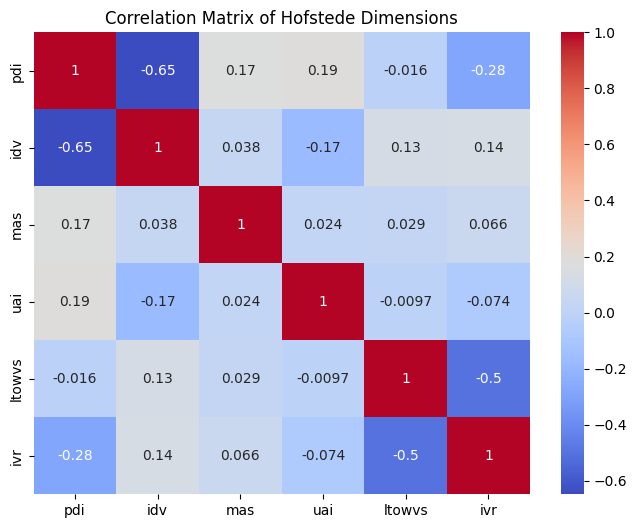

In [92]:
## 4. Data Exploration Let's look at some summary statistics and correlations.
df1.describe().T

plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot= True, cmap="coolwarm")
plt.title("Correlation Matrix of Hofstede Dimensions")
plt.show()

#Student Task: Discuss: Which dimensions seem positively or negatively correlated?
#negatively correlated: pdi and idv; ivr and itowvs; pdi and ivr;
#positively correlated: pdi and uai; pai and mas;

In [93]:
#df1.ctr.to_list()

print(df1.index.name)
print(df1.columns)


ctr
Index(['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr'], dtype='object')


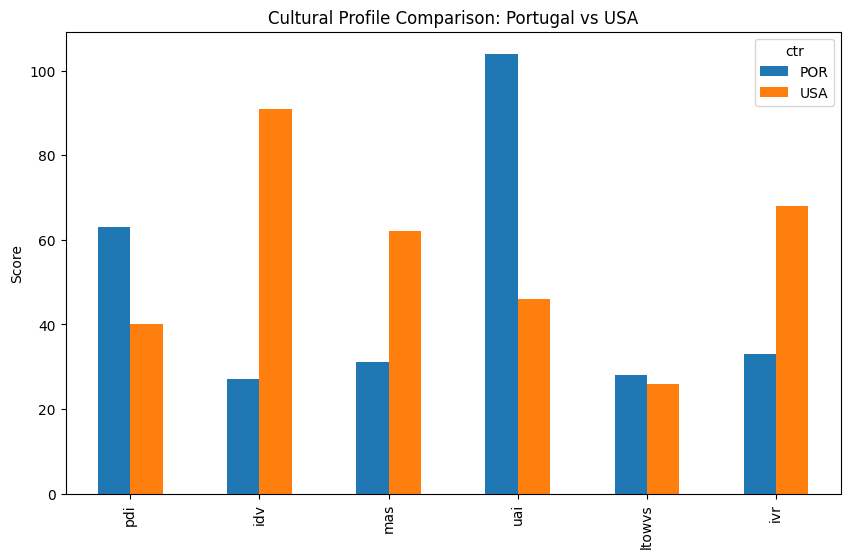

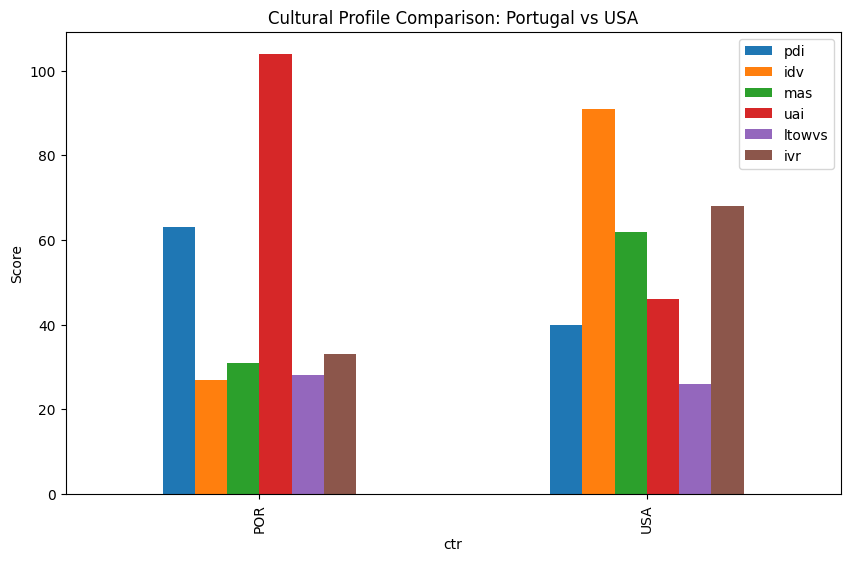

In [96]:
# 5. Visualization of Cultural Differences
# Example: Comparing Portugal and USA
if df1.index.name == 'ctr':
  df1.reset_index(drop=False, inplace=True) #make ctr revert to a normal column; drop=true:不需要旧索引，把它直接丢掉
#bar chart 1
country_subset = df1[df1['ctr'].isin(['POR', 'USA'])].set_index('ctr')
country_subset.T.plot(kind='bar', figsize=(10,6))
plt.title('Cultural Profile Comparison: Portugal vs USA')
plt.ylabel('Score')
plt.show()

#bar chart 2
country_subset = df1[df1['ctr'].isin(['POR', 'USA'])].set_index('ctr')
country_subset.plot(kind='bar', figsize=(10,6))
plt.title('Cultural Profile Comparison: Portugal vs USA')
plt.ylabel('Score')
plt.show()




In [97]:
print(df1.index.name)
print(df1.columns)

None
Index(['ctr', 'pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr'], dtype='object')


In [99]:
# Radar Chart Example
#adjust
dims = ['pdi','idv','mas','uai','ltowvs','ivr']
countries = ['POR', 'USA']  #Use the 'ctr' column values
fig = go.Figure()         #初始化一个Plotly图对象（空白画布），后续add_trace往里面叠加轨迹/曲线。

if df1.index.name == 'ctr':
    df1 = df1.reset_index(drop=False)

for c in countries:
    rows = df1.loc[df1['ctr']==c, dims]
    if rows.empty:
      print(f"{c} not found in dataset, skipped.")
      continue
    values=rows.iloc[0].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=dims, # Use the dimension names for theta
        fill='toself',
        name=c
    ))

fig.update_layout(title='Cultural Profiles (Radar Chart)')
fig.show()


# Scatter Matrix
if df1.index.name == 'ctr':
    df1 = df1.reset_index(drop=False)

fig = px.scatter_matrix(df1, dimensions=df1.columns[1:], color="ctr")
fig.update_layout(title="Scatter Matrix of Hofstede Cultural Dimensions")
fig.show()


In [101]:
# Student Task:
# Create your own **comparison chart** for 3 countries of your choice.

df2 = df.drop(columns='country').dropna() #del country col, then del Nan rows
df2.set_index('ctr',inplace=True) #inplace=True: adjust on df2, don't return new table
df2.head()

,pdi,idv,mas,uai,ltowvs,ivr
ctr,,,,,,
AFE,64.0,27.0,41.0,52.0,32.0,40.0
AFW,77.0,20.0,46.0,54.0,9.0,78.0
ARA,80.0,38.0,53.0,68.0,23.0,34.0
ARG,49.0,46.0,56.0,86.0,20.0,62.0
AUL,38.0,90.0,61.0,51.0,21.0,71.0


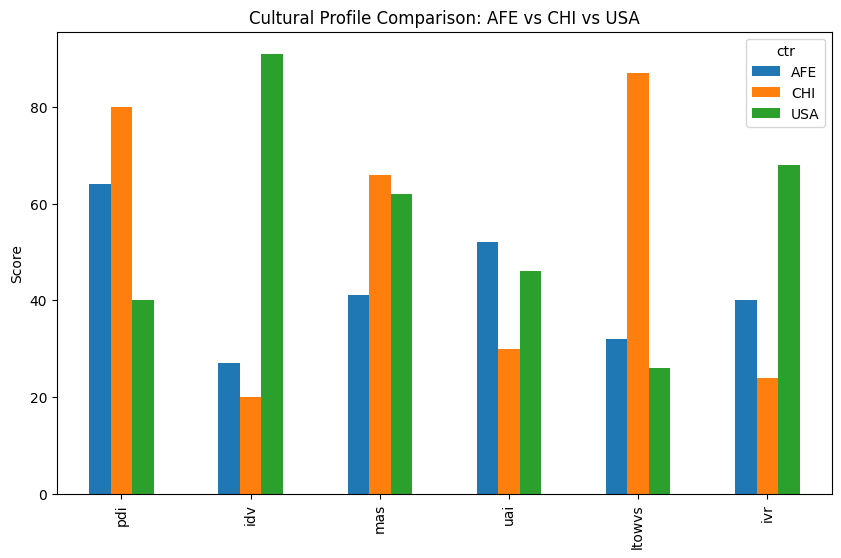

In [109]:
#Create your own **comparison chart** for 3 countries of your choice.

if df2.index.name == 'ctr':
  df2.reset_index(drop=False, inplace=True) #make ctr revert to a normal column; drop=true:不需要旧索引，把它直接丢掉

#bar chart
country_subset = df2[df2['ctr'].isin(['AFE', 'CHI', 'USA'])].set_index('ctr')
country_subset.T.plot(kind='bar', figsize=(10,6))
plt.title('Cultural Profile Comparison: AFE vs CHI vs USA')
plt.ylabel('Score')
plt.show()

#Radar Chart
dims = ['pdi','idv','mas','uai','ltowvs','ivr']
countries = ['AFE', 'CHI', 'USA']  #Use the 'ctr' column values
fig = go.Figure()         #create a empty screen

if df2.index.name == 'ctr':
    df2 = df2.reset_index(drop=False)

for c in countries:
    rows = df2.loc[df1['ctr']==c, dims]
    if rows.empty:
      print(f"{c} not found in dataset, skipped.")
      continue
    values=rows.iloc[0].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=dims, # Use the dimension names for theta
        fill='toself',
        name=c
    ))

fig.update_layout(title='Cultural Profiles (Radar Chart)')
fig.show()

# Scatter Matrix
if df2.index.name == 'ctr':
    df2 = df2.reset_index(drop=False)

selected_countries = ['AFE', 'CHI', 'USA']
fig = px.scatter_matrix(df2[df2['ctr'].isin(selected_countries)], dimensions=df2.columns[1:], color="ctr")
fig.update_layout(title="Scatter Matrix for Selected Countries")
fig.show()


In [ ]:
## 6. Cultural Clustering (Optional Extension)
# We can explore how similar countries are culturally by clustering them.

X = df1.drop(columns=['ctr'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df1['cluster'] = kmeans.fit_predict(X_scaled)

px.scatter_3d(df1, x='pdi', y='idv', z='mas', color='cluster', hover_name='ctr', title="Cultural Clusters").show()



#Student Task:
#Interpret the clusters.
#- Which countries are culturally similar?
#- Are there regional patterns?

              pdi        idv         mas         uai      ltowvs         ivr
count   78.000000  78.000000   78.000000   78.000000   96.000000   97.000000
mean    59.333333  45.166667   49.269231   67.641026   45.489583   45.391753
std     21.223405  23.971529   19.007636   22.992926   24.221345   22.177108
min     11.000000   6.000000    5.000000    8.000000    0.000000    0.000000
25%     42.500000  23.500000   40.000000   51.250000   25.750000   29.000000
50%     62.000000  43.500000   48.500000   69.500000   44.500000   43.000000
75%     72.500000  67.750000   61.750000   86.000000   63.250000   63.000000
max    104.000000  91.000000  110.000000  112.000000  100.000000  100.000000


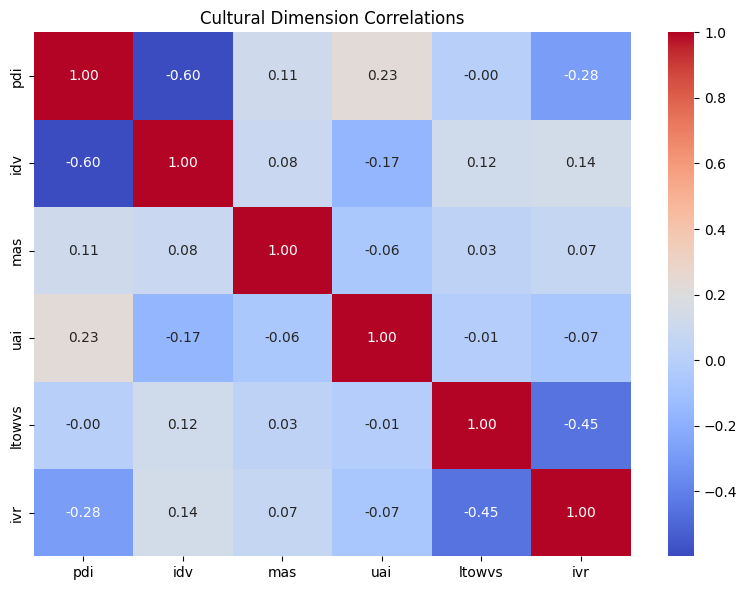

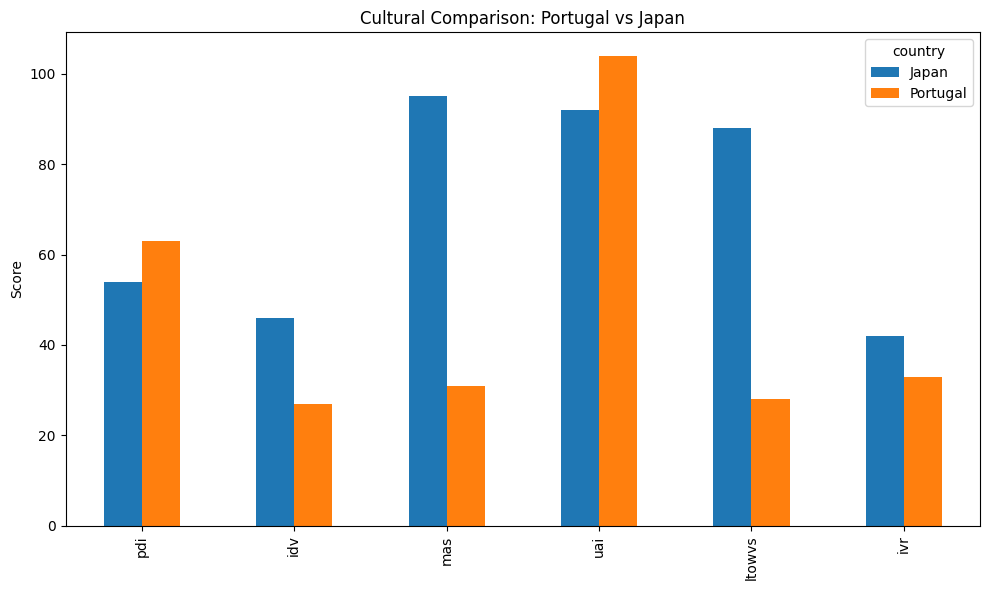

In [119]:
## 7. Object-Oriented Programming: A Cultural Analyzer Class
# We'll create a reusable class to automate cultural data exploration.
# Student Tasks:
# ✅1. Add a `.radar_chart(countries)` method using Plotly to compare countries.
# 2. Add a `.cluster_countries(k)` method that performs K-means clustering and plots results.
# ✅3. Add a `.export_clean_data(filename)` method to save the cleaned dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class CultureAnalyzer:
    def __init__(self, url):
        self.df = pd.read_csv(url, sep=";")
        self.clean_data()

    def clean_data(self):
        # Normalize column names
        self.df.columns = self.df.columns.str.strip().str.lower()
        # Drop empty rows
        self.df = self.df.dropna(how="all")

        # Try converting all columns except 'country' to numeric
        for col in self.df.columns:
            if col != 'country' and col != 'ctr':
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

        # Drop rows that don't have a valid country name or all NaNs in numeric cols
        self.df = self.df.dropna(subset=['country'])
        self.df = self.df.dropna(how="all", subset=self.df.columns.difference(['country']))

        # Strip whitespace from country names
        self.df['country'] = self.df['country'].str.strip()

    def summary(self):
        """Return statistical summary of numeric columns."""
        return self.df.describe()

    def correlation_heatmap(self):
        """Display a correlation heatmap of cultural dimensions."""
        # Select only numeric columns
        numeric_df = self.df.select_dtypes(include='number')

        if numeric_df.empty:
            print("No numeric data available for correlation heatmap.")
            return

        plt.figure(figsize=(8, 6))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Cultural Dimension Correlations')
        plt.tight_layout()
        plt.show()

    def compare_countries(self, countries):
        """Compare selected countries on cultural dimensions."""
        subset = self.df[self.df['country'].isin(countries)].set_index('country')
        subset = subset.select_dtypes(include='number')  # keep only numeric columns
        if subset.empty:
            print("No numeric data to compare for the selected countries.")
            return

        subset.T.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Cultural Comparison: {" vs ".join(countries)}')
        plt.ylabel('Score')
        plt.tight_layout()
        plt.show()

    def radar_chart(self, countries):
      if self.df.index.name == 'country':
          self.df = self.df.reset_index(drop=False)

      dims = self.df.select_dtypes(include='number').columns
      fig = go.Figure()         #create a empty screen

      for c in countries:
          rows = self.df.loc[self.df['country']==c, dims]
          if rows.empty:
            print(f"{c} not found in dataset, skipped.")
            continue
          values=rows.iloc[0].values
          fig.add_trace(go.Scatterpolar(
              r=values,
              theta=dims, # Use the dimension names for theta
              fill='toself',
              name=c
          ))

      fig.update_layout(title=f'Cultural Profiles (Radar Chart): {" vs ".join(countries)}')
      fig.show()

    def export_clean_data(self, filename="cleaned_culture_data.csv"):
      if self.df is None or self.df.empty:
        print("No data to export. Please check if the dataset was loaded and cleaned.")
        return
      try:
        self.df.to_csv(filename, index=False, encoding='utf-8')
        print(f"Cleaned dataset successfully exported to: {filename}")
      except Exception as e:
        print(f"Failed to export file. Error: {e}")


# --- Example Usage ---

analyzer = CultureAnalyzer("https://raw.githubusercontent.com/masterfloss/data/refs/heads/main/culture2015.csv")

print(analyzer.summary())

analyzer.correlation_heatmap()
analyzer.compare_countries(["Portugal", "Japan"])

analyzer.radar_chart(["Portugal", "Japan"])


In [ ]:
# 8. Reflection
#Answer briefly:

#1. Which cultural dimensions appear most strongly correlated?
# The strongest positive correlation is typically found between PDI and UAI
# A moderate negative correlation is usually seen between IDV and PDI
#2. Do countries form identifiable cultural clusters?
#3. How could these metrics inform international business or policy decisions?